In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib as plt

from functools import partial
from sklearn.metrics import precision_recall_curve

import src.evaluation.utils as u
import src.globals as g

from src.utils.anomalies import NoiseMachine
from src.methods.methods import calc_methods


In [3]:
def add_gaussian(df, columns, synratio):
    num_samples = round(len(df['seqid'].unique()) * synratio)
    synids = np.random.choice(df['seqid'].unique(), num_samples, replace=False)

    nonefunc = partial(NoiseMachine.no_anomalies, cols=columns)
    gaussianfunc = partial(NoiseMachine.gaussian_anomalies, cols=columns)

    df_none = df.groupby('seqid').apply(nonefunc).reset_index(drop=True)
    df_syn = df[df['seqid'].isin(synids)].groupby('seqid').apply(gaussianfunc).reset_index(drop=True)

    return pd.concat([df_none, df_syn])

In [4]:
# syn_ratio = 0.1
# num_samples = round(len(df_imu['seqid'].unique()) * syn_ratio)

# synids = np.array_split(np.random.choice(df_imu['seqid'].unique(), num_samples), 3)

# gaussianfunc = partial(NoiseMachine.gaussian_anomaly, col='acceleration_x')
# pointfunc = partial(NoiseMachine.point_anomaly, num=5, col='acceleration_x')
# sinusfunc = partial(NoiseMachine.sinusoidal_anomaly, anomlength=0.1, col='acceleration_x')

# syn_dfs = [df_imu[df_imu['seqid'].isin(synids[0])].groupby('seqid').apply(gaussianfunc).reset_index(drop=True),
#            df_imu[df_imu['seqid'].isin(synids[0])].groupby('seqid').apply(pointfunc).reset_index(drop=True),
#            df_imu[df_imu['seqid'].isin(synids[0])].groupby('seqid').apply(sinusfunc).reset_index(drop=True),
#            ]

# df_syn = pd.concat(syn_dfs)

In [5]:
# df_in = pd.concat([df_none, df_syn])
# df_in.to_parquet(g.path_imu_syn)


Fitting models

In [6]:
# Calculate results if not done yet
df_imu = pd.read_parquet(g.path_imu)
dfs_gaussian_in = {sensor : add_gaussian(df_imu, [f'{sensor}_{axis}' for axis in g.imu_axes3], 0.1) for sensor in g.imu_sensors_real}
dfs_gaussian_in = {sensor : add_point(df_imu, [f'{sensor}_{axis}' for axis in g.imu_axes3], 0.1) for sensor in g.imu_sensors_real}
dfs_gaussian_in = {sensor : add_sinus(df_imu, [f'{sensor}_{axis}' for axis in g.imu_axes3], 0.1) for sensor in g.imu_sensors_real}

In [7]:
df_results = {}
for (sensor, df_in) in dfs_in.items():
    print(f'calculating sensor {sensor} (gaussian noise)')
    df_results[sensor] = calc_methods(df_in, verbose=True)
    print('saving df...')
    df_results[sensor].to_parquet(f'{g.data_folder_path}/imu_results_{sensor}_gaussian.parquet')

calculating sensor acceleration (gaussian noise)
calculating (m)z-scores
calculating lof
Fitting lof_acceleration
Fitting lof_gyroscope
Fitting lof_magnetic
calculating if
Fitting if_acceleration


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Fitting if_gyroscope


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Fitting if_magnetic


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


saving df...
calculating sensor gyroscope (gaussian noise)
calculating (m)z-scores
calculating lof
Fitting lof_acceleration
Fitting lof_gyroscope
Fitting lof_magnetic
calculating if
Fitting if_acceleration


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Fitting if_gyroscope


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Fitting if_magnetic


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


saving df...
calculating sensor magnetic (gaussian noise)
calculating (m)z-scores
calculating lof
Fitting lof_acceleration
Fitting lof_gyroscope
Fitting lof_magnetic
calculating if
Fitting if_acceleration


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Fitting if_gyroscope


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Fitting if_magnetic


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


saving df...


# Calculate Series

In [3]:
df_results = {}
for sensor in g.imu_sensors_real:
    df_results[sensor] = pd.read_parquet(f'{g.data_folder_path}/imu_results_{sensor}_gaussian.parquet')

In [4]:
# sensor="acceleration"
# precentile=0.9

# columns = u._get_sensor_columns(sensor)
# thresholds = [df_results[col].quantile(precentile) for col in columns]

# df_series = u.count_by_thresholds(df_results, columns, thresholds)
# df_series
#


,seqid,z_acceleration,mz_acceleration,lof_acceleration,if_acceleration
0,2024.09.16|00.01.03|none,402,402,277,386
1,2024.09.16|00.02.37|none,457,447,357,386
2,2024.09.16|00.04.10|none,519,494,371,396
3,2024.09.16|00.05.43|none,461,447,299,377
4,2024.09.16|00.07.16|none,532,511,397,385
...,...,...,...,...,...
392,2024.09.16|23.53.08|none,522,504,363,421
393,2024.09.16|23.54.38|none,552,558,508,406
394,2024.09.16|23.56.09|none,507,523,374,416
395,2024.09.16|23.57.39|none,465,456,301,393


In [32]:
def _calc_series(df, sensor, aggr_func, onlysyn=False, removesyn=False):
    columns = u._get_sensor_columns(sensor)

    df_series = aggr_func(df, columns)
    df_anomalous = _calc_anomalous(df, onlysyn)
    df_series = df_series.merge(df_anomalous, on='seqid')

    if removesyn:
        df_series = df_series[df_series['anomaly_syn'] == 'none']

    return df_series

def _calc_anomalous(df, onlysyn=False):
    df_anomalous = df[['seqid', 'anomaly']].groupby('seqid').first().reset_index()
    df_anomalous['anomaly_syn'] = df_anomalous['seqid'].str.split('|').str[2]

    if onlysyn:
        df_anomalous['anomaly'] = 'none'

    df_anomalous['anomalous'] = (df_anomalous['anomaly'] != 'none') | (df_anomalous['anomaly_syn'] != 'none')
    return df_anomalous

def calc_and_plot_sensor(df, sensor, aggr_func, onlysyn=False, removesyn=False):
    columns = u._get_sensor_columns(sensor)

    df_series = aggr_func(df, columns)
    df_anomalous = _calc_anomalous(df, onlysyn)
    df_series = df_series.merge(df_anomalous, on='seqid')

    if removesyn:
        df_series = df_series[df_series['anomaly_syn'] == 'none']

    u.plot_rpcurves(df_series, columns, title=sensor)
    

# Plotting

f:\edmo-project\Processing\src\evaluation\utils.py:46: RuntimeWarning: invalid value encountered in divide
  # Calculte the rpc curves


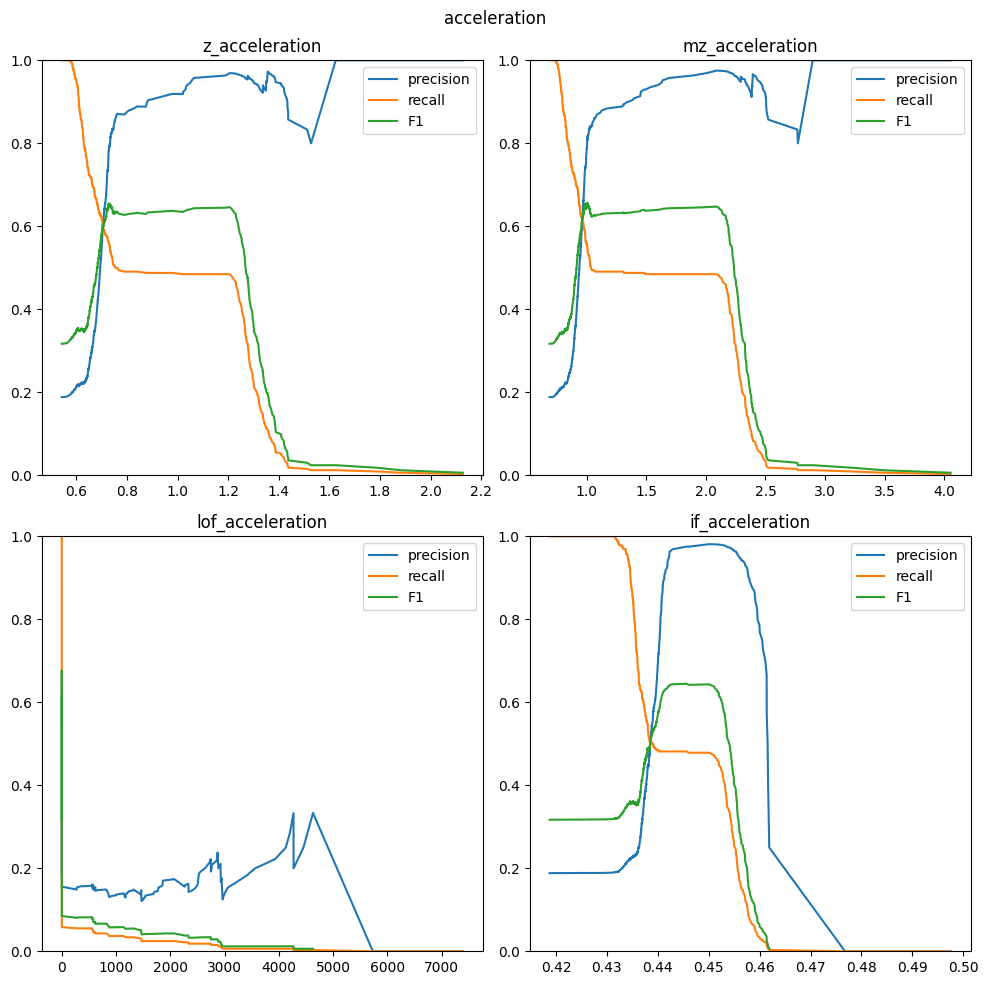

In [35]:
df_series = _calc_series(df_results["acceleration"], "acceleration", u.aggr_sum)
calc_and_plot_sensor(df_results["acceleration"], "acceleration", u.aggr_sum)

In [ ]:
thresholds = [df_results["acceleration"][col].quantile(0.9) for col in u._get_sensor_columns('acceleration')]

aggr_thresholds = partial(u.aggr_count_threshold_crossings, thresholds=thresholds)

calc_and_plot_sensor(df_results["acceleration"], "acceleration", aggr_thresholds)
calc_and_plot_sensor(df_results["acceleration"], "acceleration", u.aggr_sum)
calc_and_plot_sensor(df_results["acceleration"], "acceleration", u.aggr_squaredsum)

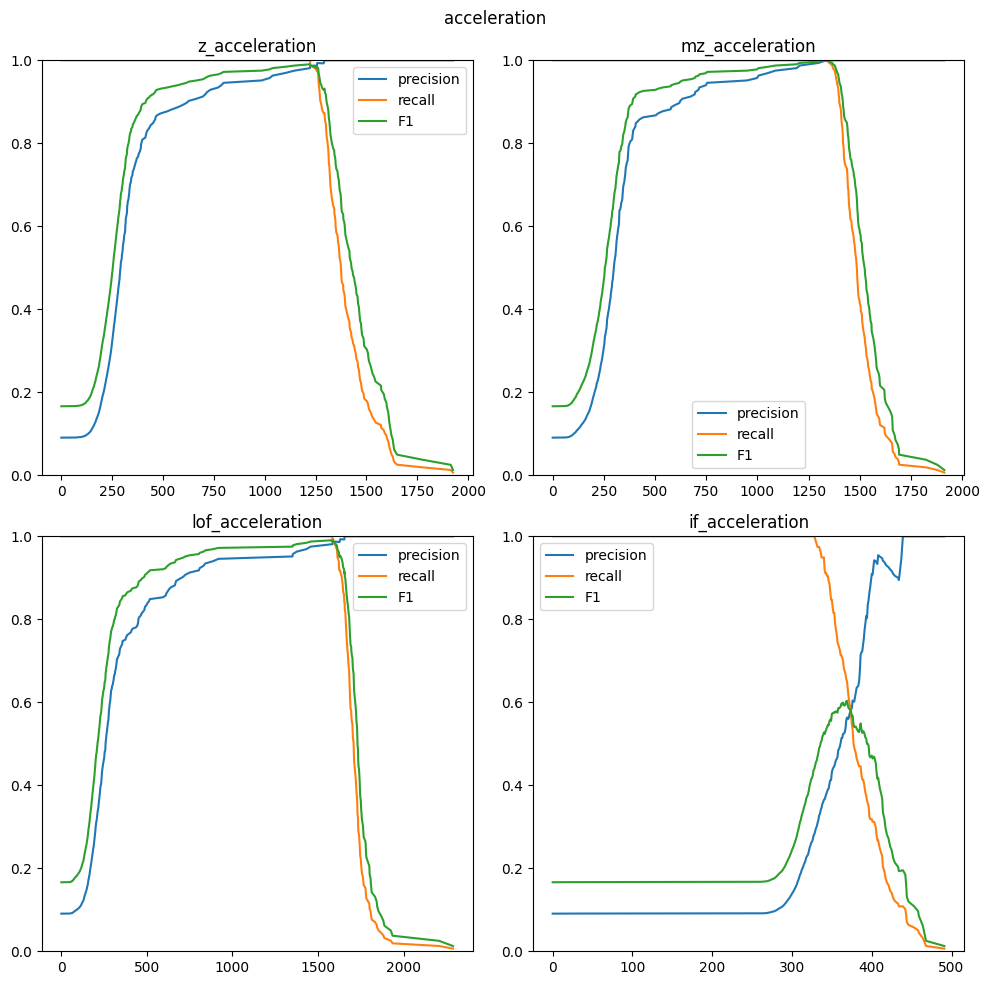

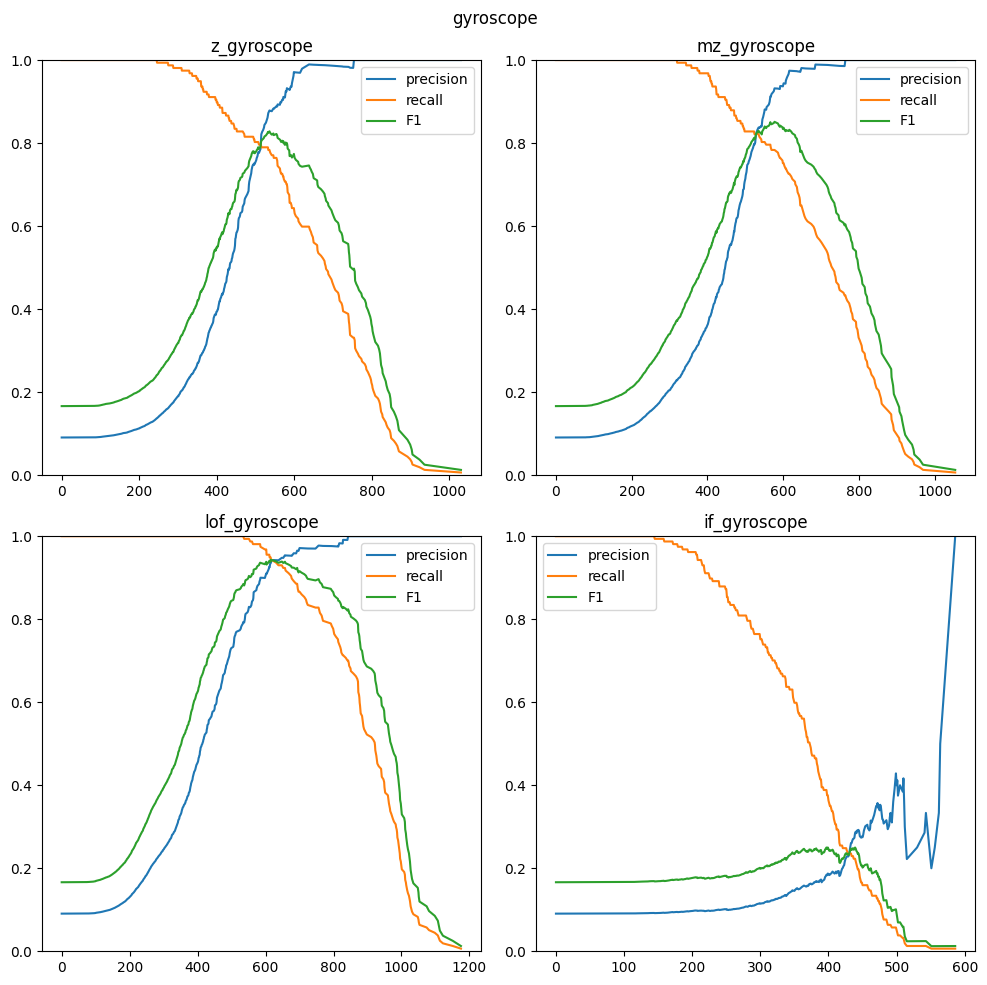

f:\edmo-project\Processing\src\evaluation\utils.py:45: RuntimeWarning: invalid value encountered in divide
  return 2 * (precision*recall)/(precision + recall)


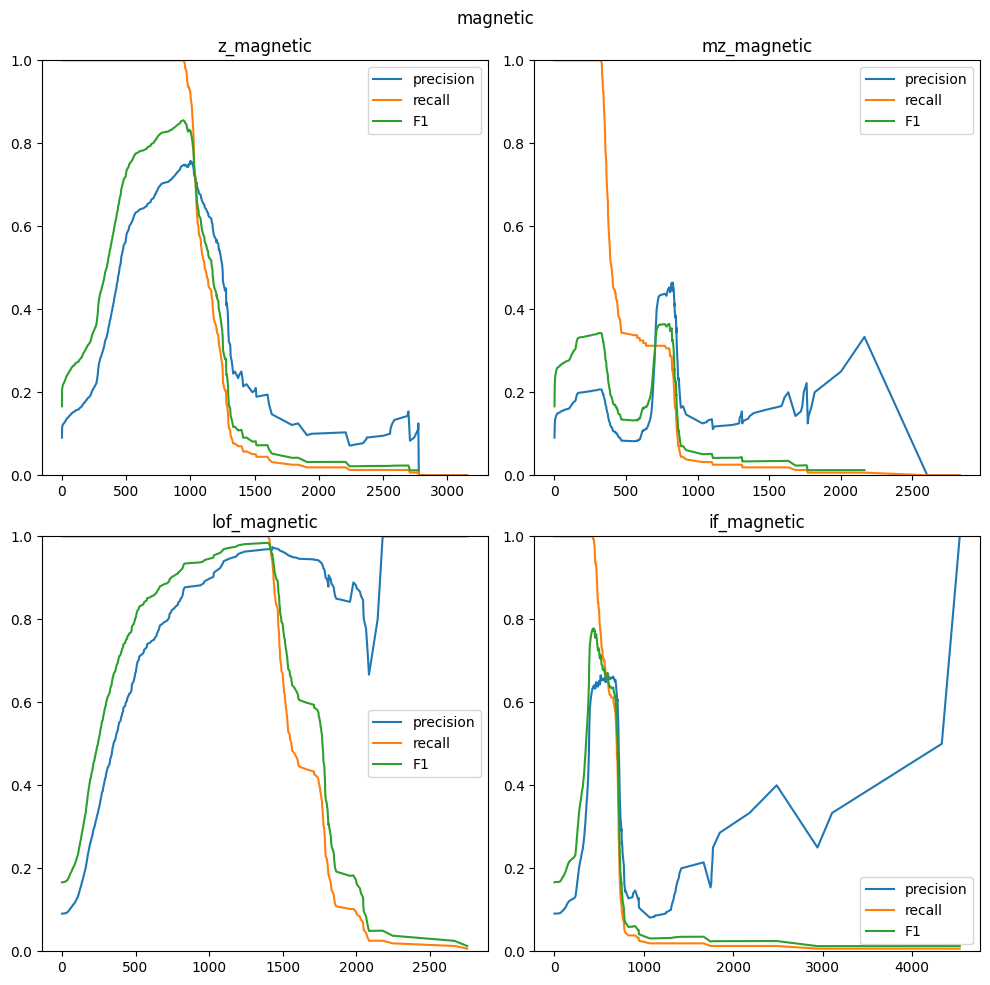

In [10]:
quantile = 0.9
calc_and_plot_sensor(df_results["acceleration"], "acceleration", quantile, True)
calc_and_plot_sensor(df_results["gyroscope"], "gyroscope", quantile, True)
calc_and_plot_sensor(df_results["magnetic"], "magnetic", quantile, True)

f:\edmo-project\Processing\src\evaluation\utils.py:45: RuntimeWarning: invalid value encountered in divide
  return 2 * (precision*recall)/(precision + recall)


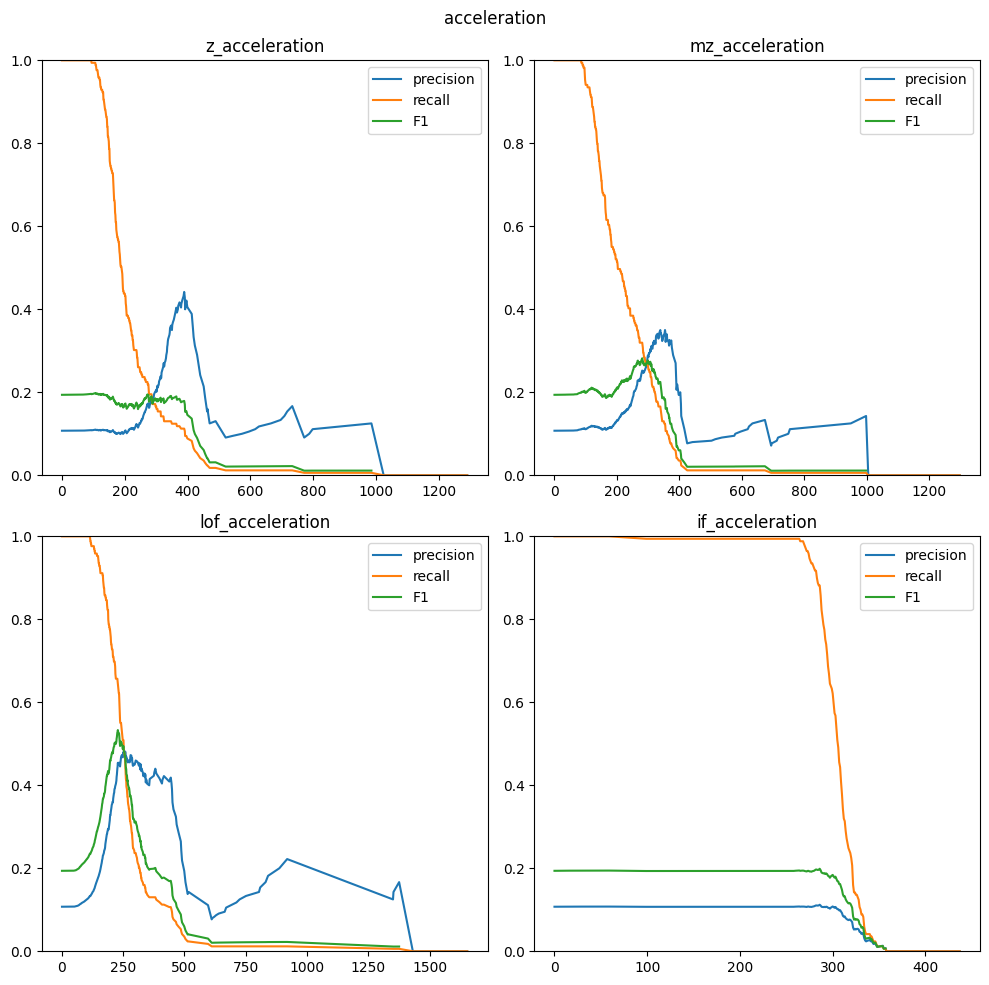

f:\edmo-project\Processing\src\evaluation\utils.py:45: RuntimeWarning: invalid value encountered in divide
  return 2 * (precision*recall)/(precision + recall)


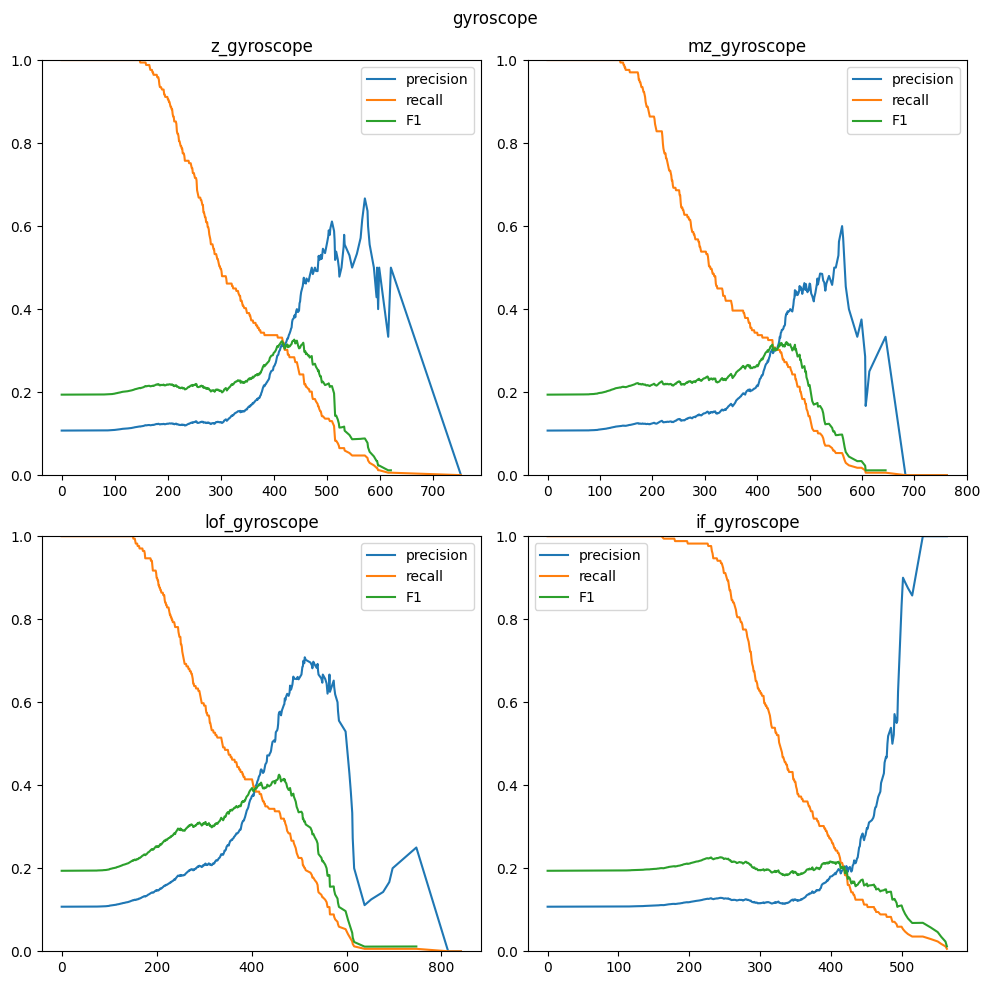

f:\edmo-project\Processing\src\evaluation\utils.py:45: RuntimeWarning: invalid value encountered in divide
  return 2 * (precision*recall)/(precision + recall)


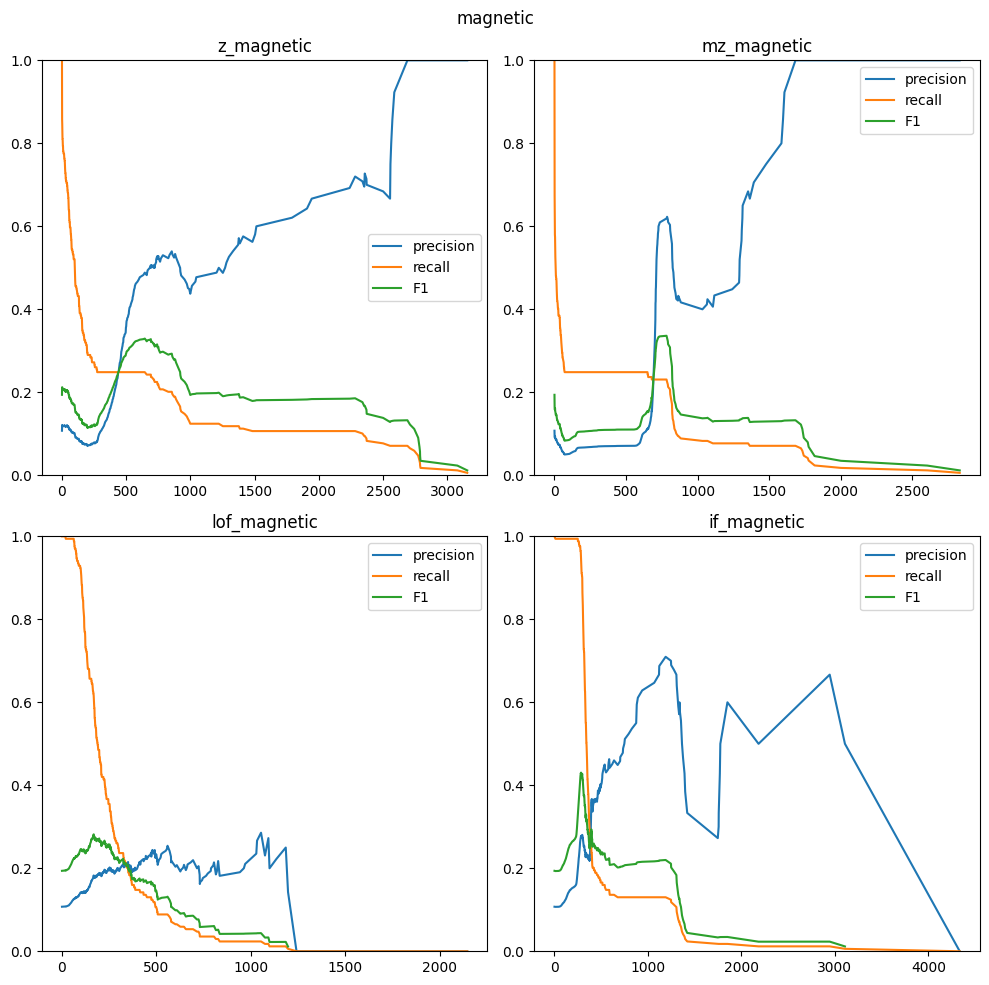

In [15]:
quantile = 0.9
calc_and_plot_sensor(df_results["acceleration"], "acceleration", quantile, removesyn=True)
calc_and_plot_sensor(df_results["gyroscope"], "gyroscope", quantile, removesyn=True)
calc_and_plot_sensor(df_results["magnetic"], "magnetic", quantile, removesyn=True)